In [2]:
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_VISIBLE_DEVICES=''


In [3]:
import numpy as np
import cv2
import pickle as pkl

In [4]:
img = cv2.imread('./data/resized_image.jpg')

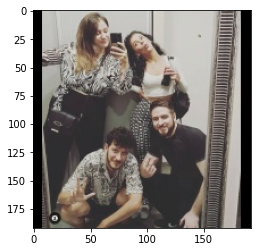

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [6]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,  14,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

In [23]:
# open a file, where you stored the pickled data
file = open("./data/boxes.pickle", 'rb')

# dump information to that file
boxes = pkl.load(file)

# close the file
file.close()

# open a file, where you stored the pickled data
file = open("./data/anchors.pickle", 'rb')

# dump information to that file
anchors = pkl.load(file)

# close the file
file.close()

# open a file, where you stored the pickled data
file = open("./data/scores.pickle", 'rb')

# dump information to that file
scores = pkl.load(file)

# close the file
file.close()


In [24]:
boxes[:,1,:]

array([[0.10977384, 0.10981974],
       [0.10420344, 0.104247  ],
       [0.11048188, 0.11051156],
       ...,
       [0.22479744, 0.22480588],
       [0.22037564, 0.22039437],
       [0.22692005, 0.22695398]], dtype=float32)

In [25]:
# Format the array as a string in C++ array format
anchors_str = '{' + ', '.join(['{' + ', '.join([f'{x:.6f}f' for x in row]) + '}' for row in anchors]) + '}'

# Write the string to a text file
with open('./data/anchors.txt', 'w') as f:
    f.write(anchors_str)

In [26]:
boxes[:,2].shape

(2304, 2)

In [27]:
boxes.shape

(2304, 8, 2)

In [28]:
boxes[:, 0] += anchors
for i in range(2, 8):
    boxes[:, i] += anchors

center = np.array(boxes[:, 0])
half_size = boxes[:, 1] / 2
boxes[:, 0] = center - half_size
boxes[:, 1] = center + half_size

In [29]:
for box in boxes[:,1,:]:
    print(box)

[0.04986864 0.04959584]
[0.06697336 0.05264615]
[0.08951962 0.0565905 ]
[0.11229044 0.05828991]
[0.1339344 0.0595165]
[0.15374333 0.0591708 ]
[0.17277491 0.05760277]
[0.18996672 0.05352417]
[0.20584854 0.04824336]
[0.2249265  0.04657501]
[0.24597885 0.04757367]
[0.26543424 0.04657589]
[0.28367805 0.04400308]
[0.30438593 0.0454537 ]
[0.3264541  0.04693725]
[0.3489347  0.04843801]
[0.37573147 0.05384917]
[0.40185204 0.05904079]
[0.42589504 0.06288497]
[0.45036975 0.06659076]
[0.47295728 0.06819347]
[0.49208134 0.06679124]
[0.5083578  0.06275185]
[0.52422523 0.05792474]
[0.5390274  0.05177982]
[0.55508834 0.04738786]
[0.57264066 0.04489888]
[0.59257734 0.04194342]
[0.61365813 0.04094638]
[0.6370451  0.04385386]
[0.6622443  0.04755468]
[0.686391  0.0498073]
[0.71000123 0.05159341]
[0.73292965 0.05332211]
[0.7556342  0.05542347]
[0.7770115  0.05673766]
[0.79634774 0.05641962]
[0.8136827  0.05345941]
[0.8294494  0.04828161]
[0.8453358  0.04283058]
[0.8619386  0.03801312]
[0.87928414 0.033648

In [10]:
anchors.shape

(2304, 2)

In [8]:
boxes[2,...]

array([[-0.02096226, -0.05392106],
       [ 0.08951962,  0.0565905 ],
       [ 0.01171673, -0.02353258],
       [ 0.05592693, -0.01186399],
       [ 0.0248886 ,  0.01421259],
       [ 0.01958733,  0.03433859],
       [-0.01586414, -0.03035269],
       [ 0.08441857, -0.00323541]], dtype=float32)

In [25]:
MIN_SCORE= 0.1
def is_valid(box: np.ndarray) -> bool:
    return np.all(box[1] > box[0])

score_above_threshold = scores > MIN_SCORE
filtered_boxes = boxes[np.argwhere(score_above_threshold)[:, 1], :]
filtered_scores = scores[score_above_threshold]

In [26]:
final_boxes = filtered_boxes*192

[[47.511524 11.647869]
 [66.299194 30.434635]
 [55.171566 17.370438]
 [61.606052 18.316593]
 [60.560814 22.248257]
 [58.405632 25.82175 ]
 [46.333405 17.708796]
 [61.92736  20.288515]]
[[51.028534 12.375518]
 [69.366745 30.713192]
 [58.51243  18.660963]
 [64.12176  18.033928]
 [64.024345 23.139004]
 [61.88602  26.443459]
 [49.137726 18.860275]
 [62.79635  18.933187]]
[[54.266365 12.419531]
 [71.920906 30.073849]
 [61.84194  18.781307]
 [65.647644 17.07319 ]
 [66.57054  23.08785 ]
 [65.25757  25.963432]
 [53.620384 18.675846]
 [64.09729  16.623102]]
[[47.584198 14.439363]
 [66.707756 33.561718]
 [54.85025  20.166786]
 [61.437737 20.673073]
 [60.79734  24.395355]
 [59.17503  28.57636 ]
 [45.694435 21.619576]
 [61.93535  22.767832]]
[[50.565147 14.458165]
 [69.70132  33.593143]
 [57.68299  20.407501]
 [64.47987  19.723763]
 [63.907074 24.113714]
 [62.50003  28.272394]
 [48.422344 22.349024]
 [64.03174  21.384209]]
[[53.30944  14.277718]
 [72.74074  33.708424]
 [60.571644 20.60967 ]
 [66.0

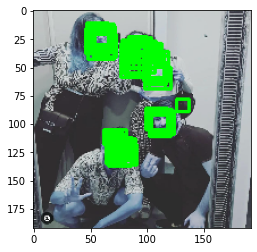

In [27]:
img = cv2.imread('./data/example.jpg')
img = cv2.resize(img,(192,192))
#plt.imshow(img)
for det in final_boxes:
    print(det)
    x1,y1 = det[0,...]
    x2,y2 = det[1,...]
    x1 = int(x1)
    y1 = int(y1)
    x2 = int(x2)
    y2 = int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(img)